### Key Questions:
1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.
2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.
3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.
4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.
5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:
- 5a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
- 5b. Are there differences in ordering habits based on a customer’s loyalty status?
- 5c. Are there differences in ordering habits based on a customer’s region?
- 5d. Is there a connection between age and family status in terms of ordering habits?
- 5e. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?
- 5f. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.


### Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path

path = r'C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis'

In [3]:
# Import data

df_project_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_all.pkl'))

In [5]:
df_project_all.shape

(32404859, 34)

In [6]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

### 1. What the busiest days of the week and hours of the day are 

In [7]:
df_project_all['orders_day_of_week'].describe()

count    3.240486e+07
mean     2.738867e+00
std      2.090077e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: orders_day_of_week, dtype: float64

Text(0.5, 0, 'Day of the Week (0 = Saturday)')

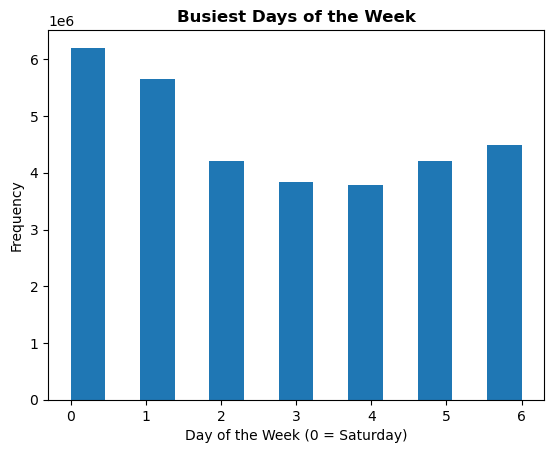

In [49]:
# Creating a histogram

busiest_days = df_project_all['orders_day_of_week'].plot.hist(bins = 13)
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.xlabel('Day of the Week (0 = Saturday)')

In [50]:
# Exporting histogram busiest_days

busiest_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_days.png'))

#### Saturday is the busiest day of the week

In [51]:
df_project_all['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

Text(0.5, 0, 'Hour of the Day')

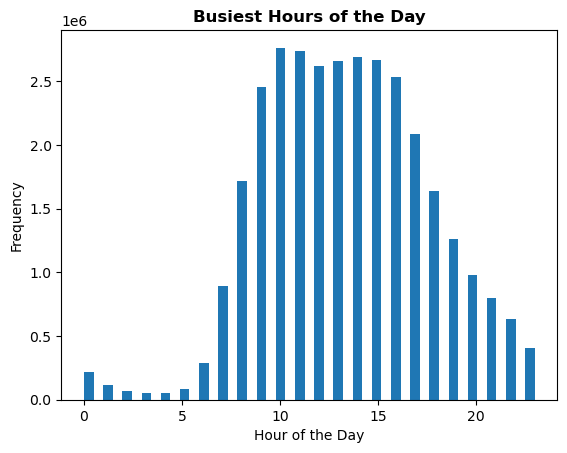

In [52]:
# Creating a histogram

busiest_hours = df_project_all['order_hour_of_day'].plot.hist(bins = 47)
plt.title('Busiest Hours of the Day', fontweight = 'bold')
plt.xlabel('Hour of the Day')

In [53]:
# Exporting histogram busiest_hours

busiest_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_hours.png'))

#### The busiest hours are started from 9 am to 5pm

### 2. Particular times of the day when people spend the most money

In [54]:
busiest_hours_price = df_project_all.groupby('order_hour_of_day').agg({'prices': ['sum']}).sort_values(by = ('prices', 'sum'), ascending = False)
busiest_hours_price

# another way to get the same result:
# hours_price = df_project_all.groupby('order_hour_of_day')['prices'].sum().sort_values(ascending = False)
# hours_price

,prices
,sum
order_hour_of_day,
10,2.140325e+07
11,2.126532e+07
14,2.098276e+07
15,2.078049e+07
13,2.073784e+07
12,2.039623e+07
16,1.978134e+07
9,1.902877e+07


Text(0.5, 0, 'Hour of the Day')

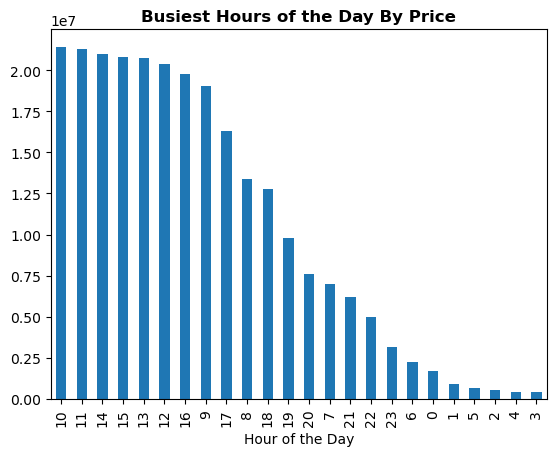

In [55]:
# Creating a bar

bar_busiest_hours_price = busiest_hours_price.plot.bar(legend = None)
plt.title('Busiest Hours of the Day By Price', fontweight = 'bold')
plt.xlabel('Hour of the Day')

In [56]:
# Exporting the bar

bar_busiest_hours_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_hours_price.png'))

#### Basically the busiest hours of the day by price are the same from 9am to 5pm with the highest spending at 10am

In [57]:
# Importing the department.csv
# Due to memory error I couldn't save my department data from the previous dataframe, that's why I have to redo it

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [58]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [59]:
# Renaming the column name

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [60]:
# Due to a memory error, I couldn't merge df_dept and df_project_all, therefore I used another method by adding one column using a for loop
# Create a new variable (department) and assign department_id to department variable using for loop

department = []

for value in df_project_all['department_id']:
    if value == 1:
        department.append('frozen')
    elif value == 2:
        department.append('other')
    elif value == 3:
        department.append('bakery')
    elif value == 4:
        department.append('produce')
    elif value == 5:
        department.append('alcohol')
    elif value == 6:
        department.append('international')
    elif value == 7:
        department.append('beverages')
    elif value == 8:
        department.append('pets')
    elif value == 9:
        department.append('dry goods pasta')
    elif value == 10:
        department.append('bulk')
    elif value == 11:
        department.append('personal care')
    elif value == 12:
        department.append('meat seafood')
    elif value == 13:
        department.append('pantry')
    elif value == 14:
        department.append('breakfast')
    elif value == 15:
        department.append('canned goods')
    elif value == 16:
        department.append('dairy eggs')
    elif value == 17:
        department.append('household')
    elif value == 18:
        department.append('babies')
    elif value == 19:
        department.append('snacks')
    elif value == 20:
        department.append('deli')
    else:
        department.append('missing')

In [61]:
# Insert department as column in df_project_all

df_project_all['department'] = department

In [62]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [65]:
busiest_dept = df_project_all['department'].value_counts(dropna = False)
busiest_dept

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

Text(0.5, 0, 'Department')

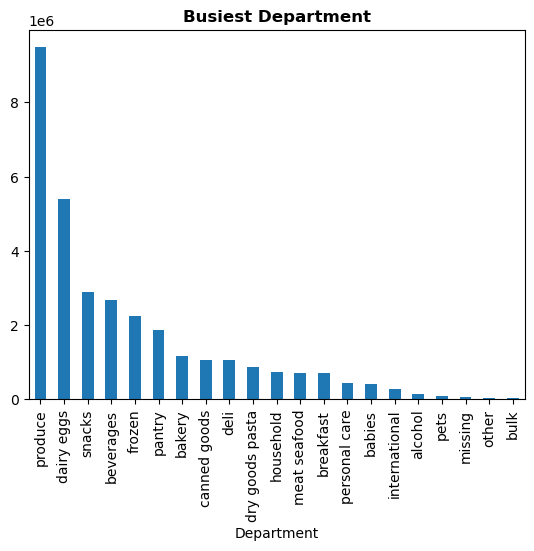

In [76]:
busiest_dept = df_project_all['department'].value_counts(dropna = False).plot.bar()
plt.title('Busiest Department', fontweight = 'bold')
plt.xlabel('Department')

#### Produce products are the best selling among customers and it would be great to put some ads about these products at busiest hours around 9am to 5pm especially during the weekend

### 3. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [ ]:
# Price range groupings from exercise 4.7:
# - for items with price <= 5, labeled as 'Low-range product'
# - for items with price > 5 and price <= 15, labeled as 'Mid-range product'
# - for items with price > 15, labeled as 'High-range product'

In [78]:
df_project_all['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

Text(0, 0.5, '')

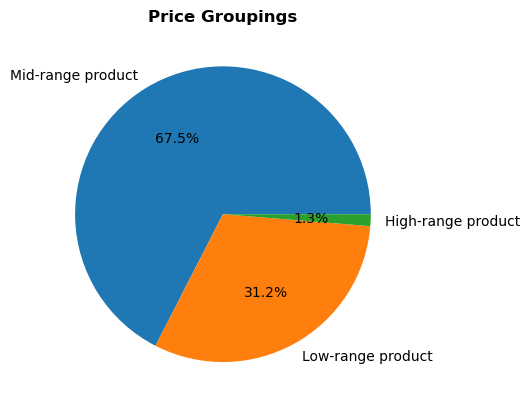

In [83]:
price_groupings = df_project_all['price_range_loc'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%')
plt.title('Price Groupings', fontweight = 'bold')
plt.ylabel(None)

#### Most of the products fall into the mid-range category with prices between 5 and 15

In [84]:
# Exporting the pie chart

price_groupings.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_groupings.png'))

### 4. Are there certain types of products that are more popular than others?

Text(0.5, 0, 'Department')

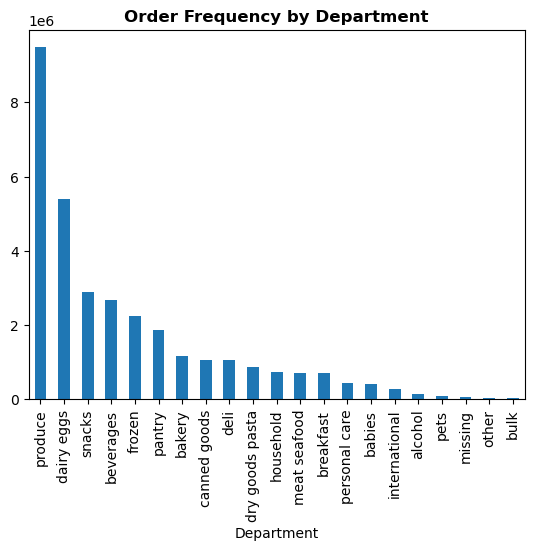

In [86]:
busiest_dept = df_project_all['department'].value_counts(dropna = False).plot.bar()
plt.title('Order Frequency by Department', fontweight = 'bold')
plt.xlabel('Department')

In [87]:
# Exporting the bar chart

busiest_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_dept .png'))

### 5. Ordering bahaviors

### 5a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [89]:
df_project_all['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [90]:
df_project_all['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: order_frequency_flag, dtype: int64

In [92]:
user_loyalty = pd.crosstab(df_project_all['loyalty_flag'], df_project_all['order_frequency_flag'], dropna = False)
user_loyalty

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1648671,2724962,1870352
Regular customer,9631222,911475,5334079


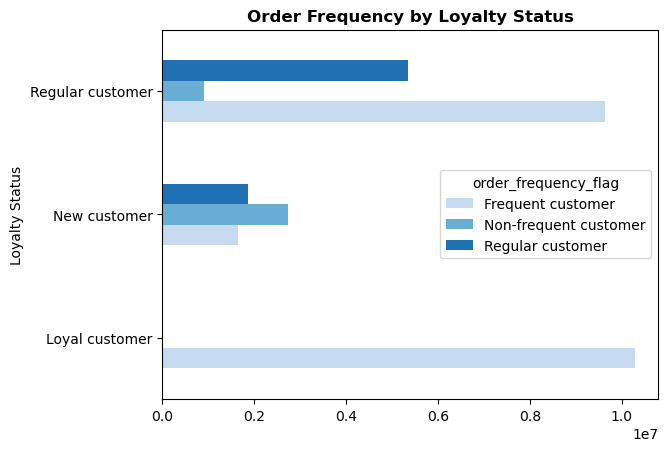

In [101]:
user_loyalty_bar = user_loyalty.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Order Frequency by Loyalty Status', fontweight = 'bold')
plt.ylabel('Loyalty Status')
plt.show()

#### The bar looks reasonable where most of the frequent customers come in from regular to loyal loyal status. Conversely, non-frequent customers come from customers with new status

In [102]:
# Exporting the bar chart

user_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_loyalty.png'))

### 5b. Are there differences in ordering habits based on a customer’s loyalty status?

In [99]:
df_project_all['spending_flag'].value_counts(dropna = False)

Low spender     32284501
High spender      120358
Name: spending_flag, dtype: int64

In [100]:
crosstab_loyalty_spending = pd.crosstab(df_project_all['loyalty_flag'], df_project_all['spending_flag'], dropna = False)
crosstab_loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,13896,10270197
New customer,59105,6184885
Regular customer,47357,15829419


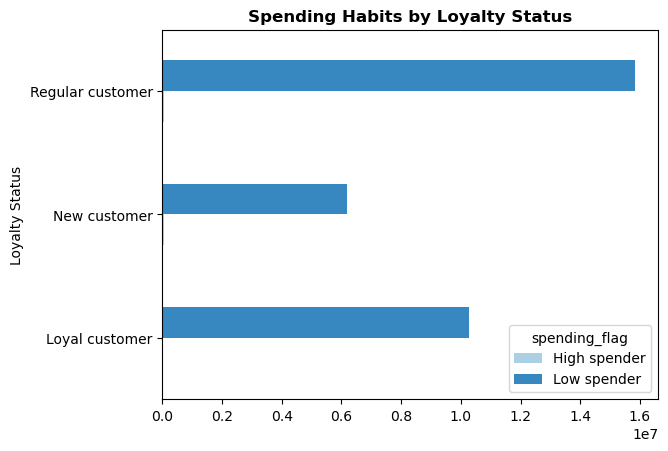

In [106]:
loyalty_spending = crosstab_loyalty_spending.plot.barh(color = sns.color_palette('Blues', 2))
plt.title('Spending Habits by Loyalty Status', fontweight = 'bold')
plt.ylabel('Loyalty Status')
plt.show()

#### It's interesting to see how loyalty status doesn't really affect customers' spending habits. The majority of customers from all loyalty statuses (new, regular, loyal) are dominated by low spender (meaning the price of the product purchased by the user is lower than 10). Through the bar chart we can also see that regular customers dominate all loyalty statuses.

In [107]:
# Exporting the bar chart

loyalty_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_loyalty.png'))

### 5c. Are there differences in ordering habits based on a customer’s region?

In [109]:
df_project_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [110]:
crosstab_region_spending = pd.crosstab(df_project_all['region'], df_project_all['spending_flag'], dropna = False)
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,29444,7567881
Northeast,18662,5704074
South,40905,10750980
West,31347,8261566


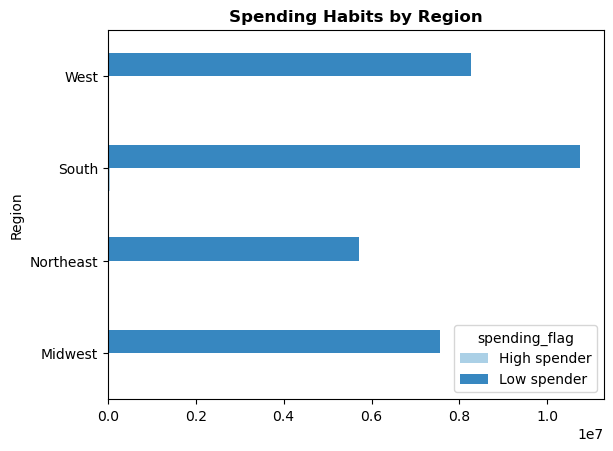

In [111]:
region_spending = crosstab_region_spending.plot.barh(color = sns.color_palette('Blues', 2))
plt.title('Spending Habits by Region', fontweight = 'bold')
plt.ylabel('Region')
plt.show()

#### The majority of customers live in the southern region and are dominated by low spending customers

In [125]:
# Exporting the bar chart

region_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending.png'))

In [112]:
df_project_all.groupby('region')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,7597325.0,7.792570,4.240118,1.0,4.2,7.4,11.3,25.0
Northeast,5722736.0,7.782379,4.241578,1.0,4.2,7.4,11.2,25.0
South,10791885.0,7.794886,4.242278,1.0,4.2,7.4,11.3,25.0
West,8292913.0,7.790314,4.241656,1.0,4.2,7.4,11.2,25.0


In [114]:
avgprice_region = df_project_all.groupby('region')['prices'].mean()
avgprice_region

region
Midwest      7.792570
Northeast    7.782379
South        7.794886
West         7.790314
Name: prices, dtype: float64

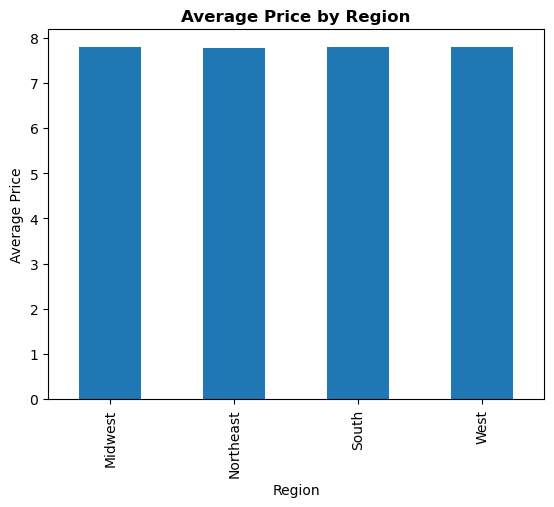

In [124]:
avgprice_region_bar = df_project_all.groupby('region')['prices'].mean().plot.bar()
plt.title('Average Price by Region', fontweight = 'bold')
plt.ylabel('Average Price')
plt.xlabel('Region')
plt.show()

#### The average price for each region is almost the same, which is around 7.7

In [126]:
# Exporting the bar chart

avgprice_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'avgprice_region.png'))

### 5d. Is there a connection between age and family status in terms of ordering habits?

In [130]:
crosstab_age_spending = pd.crosstab(df_project_all['age_group'], df_project_all['spending_flag'], dropna = False)
crosstab_age_spending

spending_flag,High spender,Low spender
age_group,,
30-39 years,18492,5055259
40-49 years,21153,5088084
50-59,19415,5044760
60-69 years,19341,4967923
70+ years,21470,6058521
Less than 30 years,20487,6069954


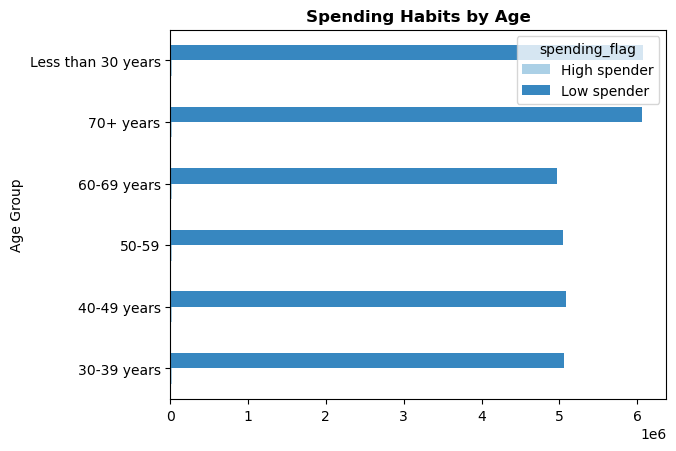

In [138]:
age_spending = crosstab_age_spending.plot.barh(color = sns.color_palette('Blues', 2))
plt.ylabel('Age Group')
plt.title('Spending Habits by Age', fontweight = 'bold')
plt.show()

#### The majority of customers come from people aged less than 30 years and over 70 years. Nonetheless, the spending flags for all age groups are the same, which is dominated by low spenders

In [143]:
# Exporting the bar chart

age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending.png'))

In [140]:
crosstab_family_department = pd.crosstab(df_project_all['department'], df_project_all['family_status'], dropna = False)
crosstab_family_department

family_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,12615,8896,105682,26503
babies,35326,20146,297162,71168
bakery,100401,56142,821881,194004
beverages,231025,124629,1889052,443417
breakfast,59498,34731,493725,115079
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175579
dairy eggs,461911,260787,3788598,887451
deli,90818,50415,735689,174327


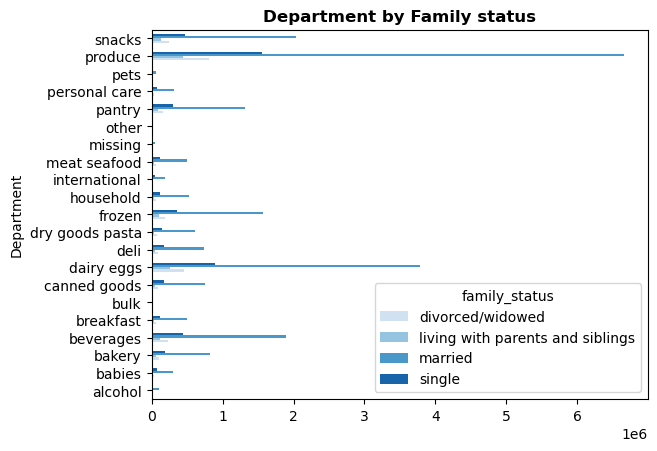

In [141]:
family_dept = crosstab_family_department.plot.barh(color = sns.color_palette('Blues', 4))
plt.title('Department by Family status', fontweight = 'bold')
plt.ylabel('Department')
plt.show()

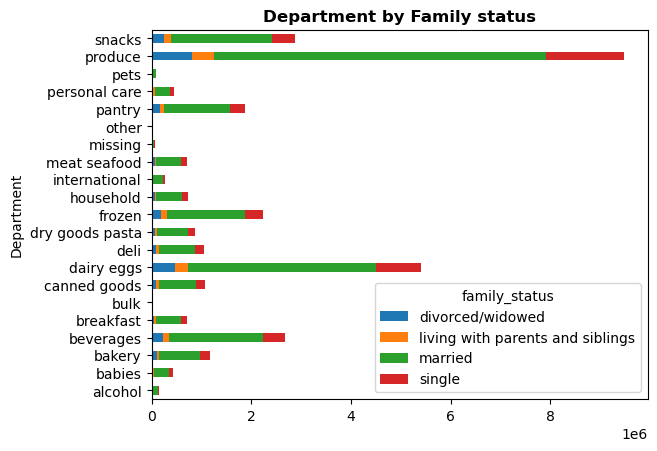

In [165]:
family_dept = crosstab_family_department.plot.barh(stacked = True)
plt.title('Department by Family status', fontweight = 'bold')
plt.ylabel('Department')
plt.show()

#### Through the chart I can see that the majority of customers are married and dominate all categories of the department

In [166]:
# Exporting the bar chart

family_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_department.png'))

### 5e. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

1. Age: Through the above analysis, the majority of customers are from people less than 30 or over 70 years but in terms of spending habits all age groups are dominated by low spenders (meaning the price of products purchased by users is lower than 10)

In [146]:
df_project_all['income_group'].value_counts(dropna = False)

Wealthy            8101288
Low-income         8101214
Moderate-income    8101207
High-income        8101150
Name: income_group, dtype: int64

In [147]:
df_project_all.groupby('income_group')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
income_group,,,,,,,,
High-income,8101150.0,7.965269,4.256994,1.0,4.4,7.7,11.4,25.0
Low-income,8101214.0,7.284196,4.159007,1.0,3.8,6.8,10.5,25.0
Moderate-income,8101207.0,7.957462,4.249882,1.0,4.4,7.7,11.4,25.0
Wealthy,8101288.0,7.956931,4.258837,1.0,4.4,7.6,11.4,25.0


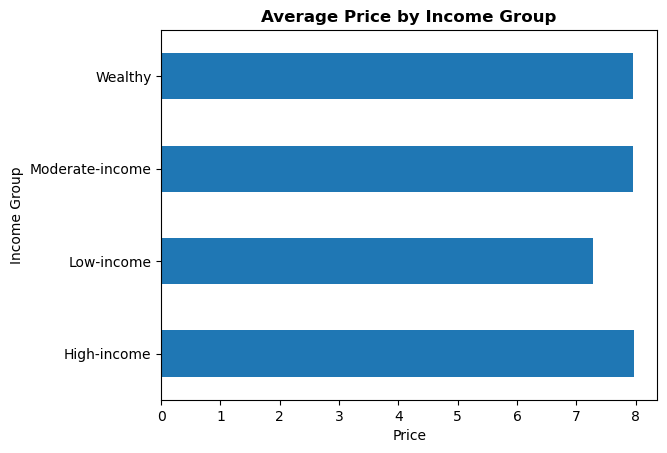

In [155]:
income_price_bar = df_project_all.groupby('income_group')['prices'].mean().plot.barh()
plt.title('Average Price by Income Group', fontweight = 'bold')
plt.ylabel('Income Group')
plt.xlabel('Price')
plt.show()

In [163]:
# Exporting the bar chart

income_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_price.png'))

2. Income: There is no significant difference in the average price spent between the moderate, high, and wealthy income groups with a yield of around 7.9. However, for customers from the low-income group, the average price they pay is lower than the other groups, which is around 7.2. Also from the output code number 146 it can be seen that Instacarts customers are spread evenly across all income groups, no income group dominates other income groups

3. Certain types of goods: From the output of code number 86, produce and dairy eggs are the products that are most in demand by customers

4. Family status: From the output of code number 141, I can see that 'married' not only dominates family status but also dominate purchases of goods from all categories in the department

### 5f. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

1. Price of orders: The average price of the low-income group is around 7.2 compared to other income groups which is about 7.9 on average. This makes sense, people with low incomes can have a tendency to buy something that is cheaper too

2. The frequency of orders: From the output of code number 101, I can see that most of the frequent customers come in from regular to loyal loyal status. Conversely, non-frequent customers come from customers with new status. I can say that this makes sense as it should be

In [157]:
# Create a crosstab between the 'department' and 'income_group' column

crosstab_department_income = pd.crosstab(df_project_all['department'], df_project_all['income_group'], dropna = False)
crosstab_department_income

income_group,High-income,Low-income,Moderate-income,Wealthy
department,,,,
alcohol,35725,39747,35231,42993
babies,112900,86445,115355,109102
bakery,297400,277183,294559,303286
beverages,635867,776540,629599,646117
breakfast,168359,196550,167481,170643
bulk,8292,9688,8790,7803
canned goods,276534,235686,275766,280072
dairy eggs,1370770,1280365,1376476,1371136
deli,264396,259797,264091,262965


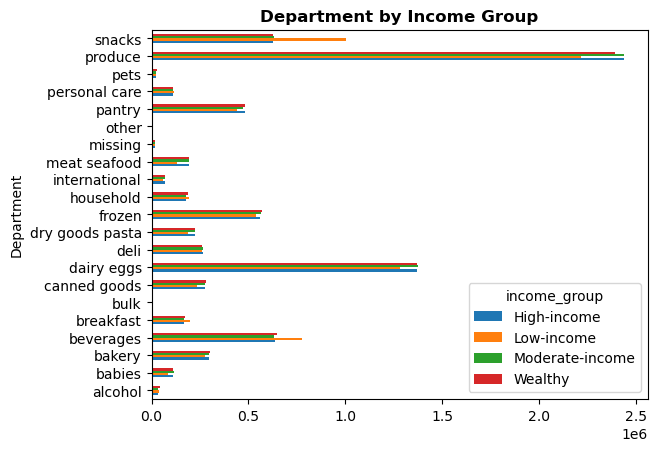

In [159]:
# Creating a bar chart of department divided by income group

bar_department_income = crosstab_department_income.plot.barh()
plt.ylabel('Department')
plt.title('Department by Income Group', fontweight = 'bold')
plt.show()

In [162]:
# Snacks and beverages are dominated by low-income people, I would like to to know the average price from this department

price_snacks_beverage = df_project_all.groupby('department')['prices'].mean().sort_values(ascending = True)
price_snacks_beverage

department
snacks              4.275437
other               6.990934
dry goods pasta     7.350283
household           7.384058
canned goods        7.539976
babies              7.638380
beverages           7.680502
international       7.682264
frozen              7.736553
deli                7.778701
bakery              7.853809
pets                7.889070
produce             7.981708
personal care       7.996769
pantry              8.009443
breakfast           8.028963
alcohol             8.143701
dairy eggs          8.334362
bulk                8.348960
missing             8.660716
meat seafood       16.294443
Name: prices, dtype: float64

3. The products customers are ordering:
- Now I can see that snacks and beverages are dominated by low-income group customers where the price of snacks itself is the cheapest compared to other departments, including beverages which are also quite cheap compared to others. Then I can conclude why the average price spent by customers who are from the low income group is lower (7.2) than the rest (7.9) because this group dominates the snack department
- Also customers who are from low-income group contributes the least income for produce, dairy eggs, and meat seafood. Now it makes sense because I already know the average price coming from these 3 departments is expensive compared to other departments

In [167]:
# Create a crosstab between the 'department' and 'region' column

crosstab_department_region = pd.crosstab(df_project_all['department'], df_project_all['region'], dropna = False)
crosstab_department_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


In [168]:
df_project_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

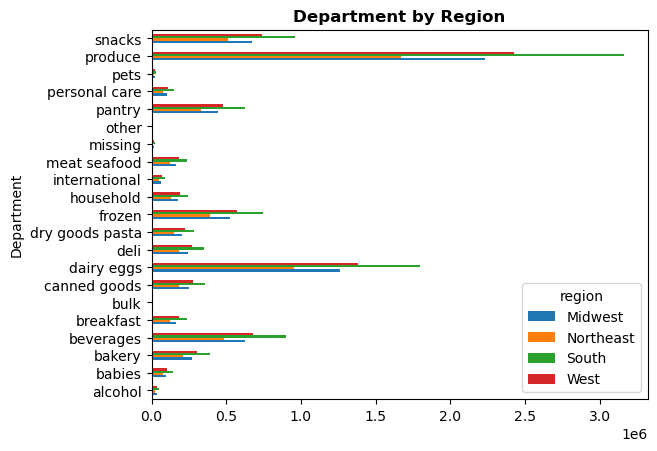

In [170]:
region_dept = crosstab_department_region.plot.barh()
plt.title('Department by Region', fontweight = 'bold')
plt.ylabel('Department')
plt.show()

4. Additional information:
The majority of customers come from the South followed by the West, Midwest and Northeast. The purchasing level of each department has the same pattern where the South region dominates the purchase orders which is in line with the number of customers who live there

In [164]:
# Exporting the bar chart

bar_department_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_income.png'))

In [171]:
# Exporting the bar chart

region_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_department.png'))